In [1]:
!pip install mlxtend

In [2]:
import pandas as pd

df = pd.read_csv('Customer Preference Survey (Responses) - Form Responses 1.csv')

In [3]:
df.head(5)

,Timestamp,playstation5,เครื่องทำขนมปัง,Ergonomic Wrist Rest,เครื่องอบผ้า,เครื่องชงกาแฟแคปซูล,เก้าอี้ LA-Z-Boy,เครื่องให้อาหารสัตว์อัตโนมัติ,บัตตาเลี่ยน,แก้วเก็บความเย็น,ลู่วิ่งออกกำลังกาย,Kindle,เครื่องซักผ้า,Bluetooth Speaker,ห้องน้ำแมวอัตโนมัติ,PS5,ทรายแมว,ลำโพง pixel,Logitech Mx Master 3 Mouse,ตุ๊กตา ty,น้ำพุแมว,Robot ดูดฝุ่น,Mechanical keyboard,Nintendo switch,หนังสือ python,gaming chair,Deskmat,Dew - ไฟโรเซ่,เทียนหอม jo malone,กระติกน้ำ 2 ลิตร,ที่นอน memory form,พลาสเตอร์บรรเทาปวด ตราเสือ,การ์ดจอ RTX 3080,ขนมจีนน้ำยาปู,Salmon Sashimi,จักรยานเสือหมอบ,ไฟแต่งห้องมินิมอล,External Harddisk,หม้อทอดไร้น้ํามัน,airpods,ยาดม,ไฟส่องหน้าไลฟ์สด
0,10/17/2021 17:29:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10/17/2021 17:43:38,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคยซื้อ,ไม่,ไม่เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคยซือ,ไม่เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
2,10/17/2021 17:43:41,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,ไม่เคย,เคย,ไม่เคยซื้อ,ไม่,ไม่เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคยซือ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
3,10/17/2021 17:43:46,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,เคย,ไม่เคย,เคย,เคยซื้อ,ไม่,ไม่เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคยซือ,ไม่เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ
4,10/17/2021 17:43:49,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคย,เคยซื้อ,ไม่,ไม่เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคยซือ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ


In [4]:
missing = df.isnull().sum()
print(missing)

Timestamp                        0
playstation5                     1
เครื่องทำขนมปัง                  1
Ergonomic Wrist Rest             1
เครื่องอบผ้า                     1
เครื่องชงกาแฟแคปซูล              1
เก้าอี้ LA-Z-Boy                 1
เครื่องให้อาหารสัตว์อัตโนมัติ    1
บัตตาเลี่ยน                      2
แก้วเก็บความเย็น                 1
ลู่วิ่งออกกำลังกาย               1
Kindle                           1
เครื่องซักผ้า                    1
Bluetooth Speaker                1
ห้องน้ำแมวอัตโนมัติ              1
PS5                              1
ทรายแมว                          1
ลำโพง pixel                      1
Logitech Mx Master 3 Mouse       1
ตุ๊กตา ty                        1
น้ำพุแมว                         1
Robot ดูดฝุ่น                    1
Mechanical keyboard              2
Nintendo switch                  2
หนังสือ python                   1
gaming chair                     2
Deskmat                          1
Dew - ไฟโรเซ่                    1
เทียนหอม jo malone  

In [5]:
df_clean1 = df.drop('Timestamp',1)
df_clean1 = df_clean1[1:]
df_clean1.head(5)

,playstation5,เครื่องทำขนมปัง,Ergonomic Wrist Rest,เครื่องอบผ้า,เครื่องชงกาแฟแคปซูล,เก้าอี้ LA-Z-Boy,เครื่องให้อาหารสัตว์อัตโนมัติ,บัตตาเลี่ยน,แก้วเก็บความเย็น,ลู่วิ่งออกกำลังกาย,Kindle,เครื่องซักผ้า,Bluetooth Speaker,ห้องน้ำแมวอัตโนมัติ,PS5,ทรายแมว,ลำโพง pixel,Logitech Mx Master 3 Mouse,ตุ๊กตา ty,น้ำพุแมว,Robot ดูดฝุ่น,Mechanical keyboard,Nintendo switch,หนังสือ python,gaming chair,Deskmat,Dew - ไฟโรเซ่,เทียนหอม jo malone,กระติกน้ำ 2 ลิตร,ที่นอน memory form,พลาสเตอร์บรรเทาปวด ตราเสือ,การ์ดจอ RTX 3080,ขนมจีนน้ำยาปู,Salmon Sashimi,จักรยานเสือหมอบ,ไฟแต่งห้องมินิมอล,External Harddisk,หม้อทอดไร้น้ํามัน,airpods,ยาดม,ไฟส่องหน้าไลฟ์สด
1,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคยซื้อ,ไม่,ไม่เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคยซือ,ไม่เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
2,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,ไม่เคย,เคย,ไม่เคยซื้อ,ไม่,ไม่เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคยซือ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
3,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,เคย,ไม่เคย,เคย,เคยซื้อ,ไม่,ไม่เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคยซือ,ไม่เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ
4,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคย,เคยซื้อ,ไม่,ไม่เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคยซือ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
5,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,ไม่เคย,ไม่เคย,เคย,เคยซื้อ,ไม่,ไม่เคยซื้อ,เคย,ไม่เคย,ไม่เคยซือ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ


In [6]:
def to_unit(x) :
  if "ไม่เคย" in str(x) :
    return 0
  elif "เคยซื้อ" in str(x) :
    return 1
  elif "เคย" in str(x) :
    return 1
  elif "ไม่" in str(x) :
    return 0
  else :
    return 0

df_clean2 = df_clean1.applymap(to_unit)

df_clean2.head()

,playstation5,เครื่องทำขนมปัง,Ergonomic Wrist Rest,เครื่องอบผ้า,เครื่องชงกาแฟแคปซูล,เก้าอี้ LA-Z-Boy,เครื่องให้อาหารสัตว์อัตโนมัติ,บัตตาเลี่ยน,แก้วเก็บความเย็น,ลู่วิ่งออกกำลังกาย,Kindle,เครื่องซักผ้า,Bluetooth Speaker,ห้องน้ำแมวอัตโนมัติ,PS5,ทรายแมว,ลำโพง pixel,Logitech Mx Master 3 Mouse,ตุ๊กตา ty,น้ำพุแมว,Robot ดูดฝุ่น,Mechanical keyboard,Nintendo switch,หนังสือ python,gaming chair,Deskmat,Dew - ไฟโรเซ่,เทียนหอม jo malone,กระติกน้ำ 2 ลิตร,ที่นอน memory form,พลาสเตอร์บรรเทาปวด ตราเสือ,การ์ดจอ RTX 3080,ขนมจีนน้ำยาปู,Salmon Sashimi,จักรยานเสือหมอบ,ไฟแต่งห้องมินิมอล,External Harddisk,หม้อทอดไร้น้ํามัน,airpods,ยาดม,ไฟส่องหน้าไลฟ์สด
1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0
3,0,0,0,1,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,1,1,1,0,1,1,0,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0
5,0,0,0,1,0,1,0,1,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1,0,0,1,1,0,1,1,0,1,0


In [7]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frequent_itemsets = apriori(df_clean2, min_support=0.2, use_colnames=True)

In [16]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(เครื่องชงกาแฟแคปซูล),(แก้วเก็บความเย็น),0.347826,0.717391,0.304348,0.875000,1.219697,0.054820,2.260870
1,(แก้วเก็บความเย็น),(เครื่องชงกาแฟแคปซูล),0.717391,0.347826,0.304348,0.424242,1.219697,0.054820,1.132723
2,(เครื่องซักผ้า),(เครื่องชงกาแฟแคปซูล),0.521739,0.347826,0.217391,0.416667,1.197917,0.035917,1.118012
3,(เครื่องชงกาแฟแคปซูล),(เครื่องซักผ้า),0.347826,0.521739,0.217391,0.625000,1.197917,0.035917,1.275362
4,(Bluetooth Speaker),(เครื่องชงกาแฟแคปซูล),0.739130,0.347826,0.304348,0.411765,1.183824,0.047259,1.108696
5,(เครื่องชงกาแฟแคปซูล),(Bluetooth Speaker),0.347826,0.739130,0.304348,0.875000,1.183824,0.047259,2.086957
6,(เครื่องชงกาแฟแคปซูล),(พลาสเตอร์บรรเทาปวด ตราเสือ),0.347826,0.565217,0.239130,0.687500,1.216346,0.042533,1.391304
7,(พลาสเตอร์บรรเทาปวด ตราเสือ),(เครื่องชงกาแฟแคปซูล),0.565217,0.347826,0.239130,0.423077,1.216346,0.042533,1.130435
8,(เครื่องชงกาแฟแคปซูล),(Salmon Sashimi),0.347826,0.847826,0.304348,0.875000,1.032051,0.009452,1.217391
9,(Salmon Sashimi),(เครื่องชงกาแฟแคปซูล),0.847826,0.347826,0.304348,0.358974,1.032051,0.009452,1.017391


In [48]:
#rules[ (rules['lift'] >= 1) & (rules['confidence'] >= 0.5) & (rules['support'] >= 0.5) ]

rules_1 = rules[(rules['lift'] >= 1) &
      (rules['confidence'] >= 0.5) &
      (rules['support'] >= 0.5) &
      (rules['antecedents'].apply( lambda x:len(x))==1) &
      (rules['consequents'].apply( lambda x:len(x))==1)]

rules_1  = rules_1 .sort_values(by='lift',ascending=False)
rules_1 .head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
127,(พลาสเตอร์บรรเทาปวด ตราเสือ),(ยาดม),0.565217,0.826087,0.543478,0.961538,1.163968,0.076560,4.521739
126,(ยาดม),(พลาสเตอร์บรรเทาปวด ตราเสือ),0.826087,0.565217,0.543478,0.657895,1.163968,0.076560,1.270903
145,(หม้อทอดไร้น้ํามัน),(External Harddisk),0.543478,0.804348,0.500000,0.920000,1.143784,0.062854,2.445652
144,(External Harddisk),(หม้อทอดไร้น้ํามัน),0.804348,0.543478,0.500000,0.621622,1.143784,0.062854,1.206522
123,(พลาสเตอร์บรรเทาปวด ตราเสือ),(External Harddisk),0.565217,0.804348,0.500000,0.884615,1.099792,0.045369,1.695652
122,(External Harddisk),(พลาสเตอร์บรรเทาปวด ตราเสือ),0.804348,0.565217,0.500000,0.621622,1.099792,0.045369,1.149068
121,(Salmon Sashimi),(พลาสเตอร์บรรเทาปวด ตราเสือ),0.847826,0.565217,0.521739,0.615385,1.088757,0.042533,1.130435
120,(พลาสเตอร์บรรเทาปวด ตราเสือ),(Salmon Sashimi),0.565217,0.847826,0.521739,0.923077,1.088757,0.042533,1.978261
83,(ยาดม),(Bluetooth Speaker),0.826087,0.739130,0.652174,0.789474,1.068111,0.041588,1.239130
82,(Bluetooth Speaker),(ยาดม),0.739130,0.826087,0.652174,0.882353,1.068111,0.041588,1.478261


In [20]:
import matplotlib.pyplot as plt
import networkx as nx
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')


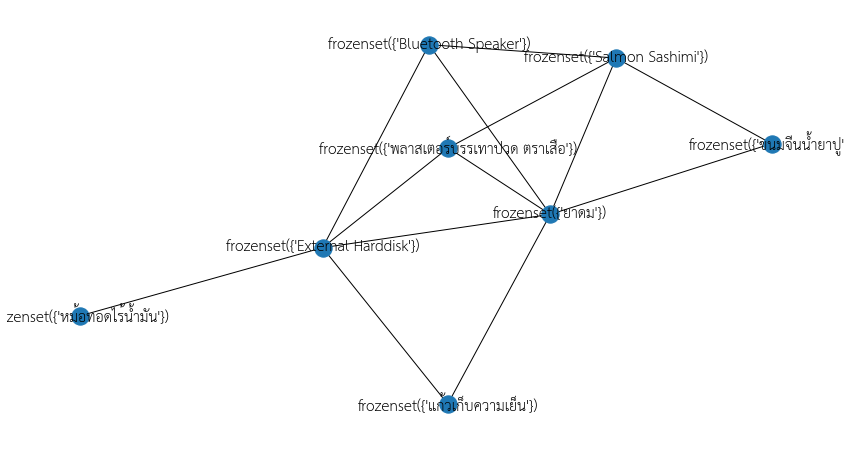

In [49]:
fig, ax=plt.subplots(figsize=(15,8))
GA=nx.from_pandas_edgelist(rules_1,source='antecedents',target='consequents')
nx.draw(GA,with_labels=True, font_family='TH Sarabun New', font_size = 14)
plt.show()


In [23]:
hot_encoded_df=df_clean2.copy()

item_item_matrix = pd.DataFrame(index=hot_encoded_df.columns,columns=hot_encoded_df.columns)

In [24]:
from scipy.spatial.distance import cosine

for i in range(0,len(item_item_matrix.columns)) :
    # Loop through the columns for each column
    for j in range(0,len(item_item_matrix.columns)) :
      # Fill in placeholder with cosine similarities
      item_item_matrix.iloc[i,j] = 1 -cosine(hot_encoded_df.iloc[:,i],hot_encoded_df.iloc[:,j])

In [25]:
links = item_item_matrix.rename_axis('related item', 
                                     axis='columns').stack().reset_index()
links.columns = ['item', 'related item','value']

In [41]:
links_filtered=links.loc[ (links['value'] > 0.8) & 
                         (links['item'] != links['related item']) ]

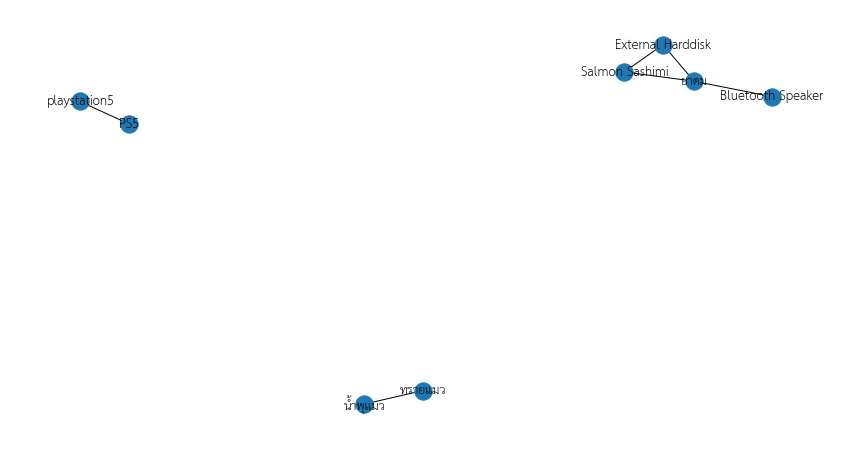

In [44]:

fig, ax=plt.subplots(figsize=(15,8))
GA=nx.from_pandas_edgelist(links_filtered,source='item',target='related item')
nx.draw(GA,with_labels=True, font_family='TH Sarabun New', font_size =12)
plt.show()

ทำ Bundle ระหว่าง พลาสเตอร์บรรเทาปวด ตราเสือ + ยาดม

Recommend cross-selling ระหว่าง 
- ทรายแมว + น้ำพุแมว
- ยาดม + Salmon Sashimi
- ยาดม + Bluetooth Speaker
- ยาดม + External Harddisk
- Salmon Sashimi + External Harddisk

